<a href="https://colab.research.google.com/github/SaraMuayad/Electropi_AI_Projects/blob/main/Charges_from_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [10]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

,0
age,1
sex,0
bmi,4
children,0
smoker,0
region,3
charges,0


ئەگەر داتایەکی بەتاڵمان هەبوو بەمجۆرە پڕئەکەینەوە#

In [14]:
data['region'].fillna(data['region'].mode()[0], inplace=True)

In [15]:
data.isnull().sum()

,0
age,1
sex,0
bmi,4
children,0
smoker,0
region,0
charges,0


BMI (Numerical) & Age (Numerical):
لەبەر ئەوەی بما و تەمەن ژمارەن بۆیە مینی بۆ بەکارئەهیێنین

In [21]:
data['age'].fillna(data['age'].mean(), inplace=True)


/tmp/ipython-input-2263950055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [23]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

/tmp/ipython-input-620513141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [24]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [25]:
data.dtypes

,0
age,float64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [26]:
data['sex'] = data['sex'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')

In [27]:
data.dtypes

,0
age,float64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.213164,14.048166,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.662871,6.084916,15.9600,26.31500,30.400,34.656250,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [33]:
numerical_data = data.select_dtypes(include=['float64', 'int64']).copy()
numerical_data['smoker'] = data['smoker']
smok_data = numerical_data.groupby("smoker").mean().round(2)
display(smok_data)

/tmp/ipython-input-1389846269.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smok_data = numerical_data.groupby("smoker").mean().round(2)


,age,bmi,children,charges
smoker,,,,
no,39.39,30.66,1.09,8434.27
yes,38.51,30.67,1.11,32050.23


In [35]:
sns.set_style("whitegrid")

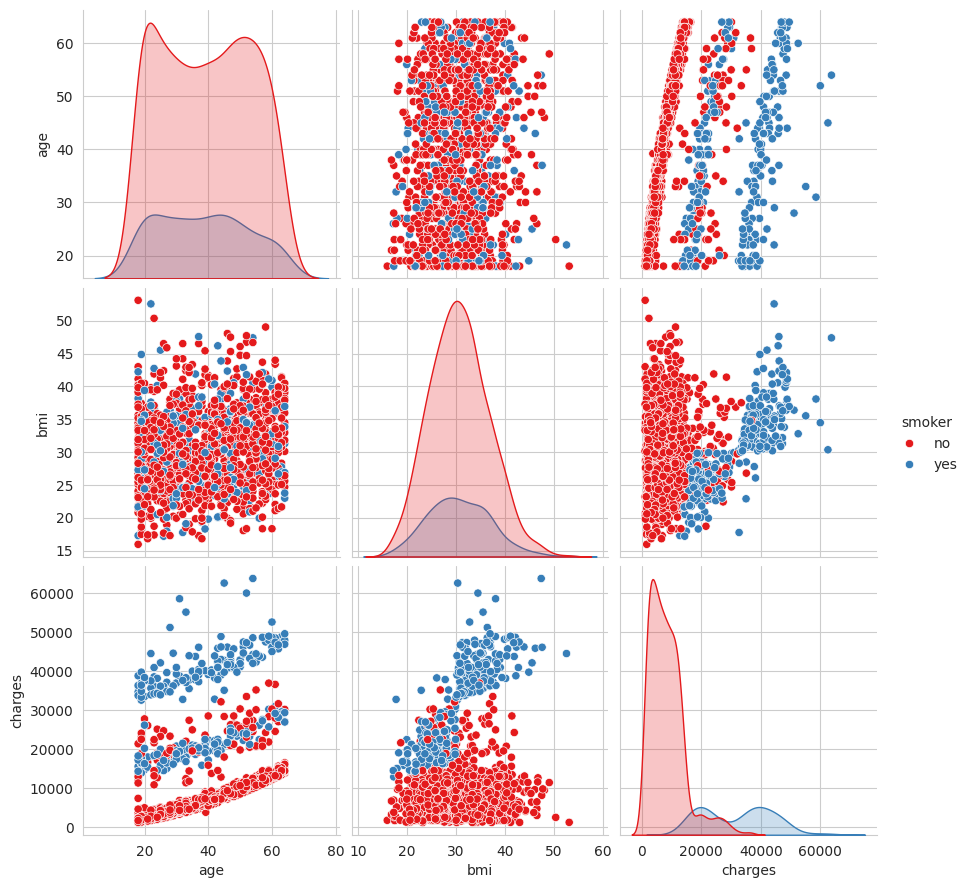

In [36]:
sns.pairplot(
    data[["age", "bmi", "charges", "smoker"]],
    hue = "smoker",
    height = 3,
    palette = "Set1")

<Axes: >

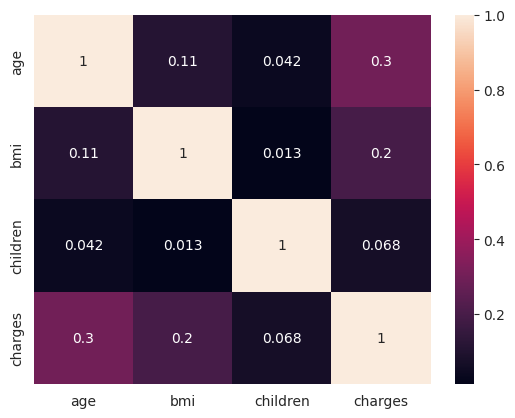

In [38]:
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot= True)

In [39]:
data = pd.get_dummies(data)

In [40]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [42]:
y = data['charges']


In [43]:
x = data.drop('charges', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    train_size=0.80,
    random_state = 1)

In [51]:
lr = LinearRegression()

In [53]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
round(lr.score(X_test, y_test), 3)

0.762

In [56]:
y_pred = lr.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
import math

In [61]:
math.sqrt(mean_squared_error(y_test, y_pred))

5956.155721573856

In [62]:
data_new = X_train[:1]

In [63]:
lr.predict(data_new)

array([10497.35380678])

In [64]:
y_train[:1]

,charges
216,10355.641
